# Class Workbook

## In class activity

In [4]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
import ISLP as islp
from ISLP.models import ModelSpec as MS

### Ames Housing data

Please take a look at the Ames Hoursing data.

In [2]:
ames_raw=pd.read_csv("ames_raw.csv")

### Questions

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [3]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [4]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Here are few rules:

- You are not allowed to use the test data.
- Try 3 of the regularization methods discussed in Ch6.
- You should use a resampling method that is most appropriate for choosing the hyper parameters.

Your code:

In [62]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
ames_raw_2008 = ames_raw.query('`Yr Sold` < 2008').copy()
numerical_features = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd']
categorical_features = ['Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Exter Qual', 'Foundation', 'Heating QC', 'Central Air']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

y = ames_raw_2008['SalePrice']

X = ames_raw_2008[numerical_features + categorical_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LassoCV(cv=5, random_state=42))])

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RidgeCV(cv=5))])

elasticnet_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', ElasticNetCV(cv=5, random_state=42))])

lasso_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
elasticnet_pipeline.fit(X_train, y_train)

lasso_pred = lasso_pipeline.predict(X_test)
ridge_pred = ridge_pipeline.predict(X_test)
elasticnet_pred = elasticnet_pipeline.predict(X_test)

lasso_rmse = calc_loss(lasso_pred, y_test)
ridge_rmse = calc_loss(ridge_pred, y_test)
elasticnet_rmse = calc_loss(elasticnet_pred, y_test)

print(f"LASSO RMSE: {lasso_rmse}")
print(f"RIDGE RMSE: {ridge_rmse}")
print(f"ELASTIC NET RMSE: {elasticnet_rmse}")


LASSO RMSE: (29888.911730306965, 5107564.690261057)
RIDGE RMSE: (30180.0463615558, 5020423.548117716)
ELASTIC NET RMSE: (76005.68223206808, 10587385.603176821)



- For each of the models you've run, can you interpret which variable impacts the outcome the most?
Are the results consistent across different methods?

Your code:

In [59]:
ames_raw_2008.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Try these methods with bootstrap, are the results consistent?

Your code:

In [7]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Based on all the models you've run, which result predicts the best?  Which one is most easy to understand?  Which method gives the most stable results?

Your code:

In [8]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### Best Subset

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

(a) Use the `normal()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

Your code:

In [43]:
np.random.seed(0)
n = 100
X = np.random.normal(size=n)  # Predictor
epsilon = np.random.normal(size=n)

(b) Generate a response vector $Y$ of length $n = 100$ according to the model $$\mathbf{y} = \boldsymbol{\beta}_0 + \beta_1X + \beta2X^2 + \beta_3X^3 + \epsilon$$, where $\beta_{0}$ , $\beta_{1}$, $\beta_{2}$, and $\beta_{3}$ are constants of your choice.

Your code:

In [7]:
beta_0 = 0.5  
beta_1 = 1.5  
beta_2 = -0.5  
beta_3 = 0.2  

Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon



(c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X$, $X^{2},\dots,X^{10}$. What is the best model obtained according to $C_p$ , BIC, and adjusted $R^2$ ? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

Your code:

In [49]:

def fit_model(predictors):
    X = sm.add_constant(df[list(predictors)])  
    model = sm.OLS(df['Y'], X).fit()
    return model

results = []
for k in range(1, len(df.columns)): 
    for subset in combinations(df.columns[:-1], k):
        model = fit_model(subset)
        results.append({
            'model': model,
            'predictors': subset,
            'RSS': ((model.predict() - df['Y']) ** 2).sum(),
            'AIC': model.aic,
            'BIC': model.bic,
            'Adj_R2': model.rsquared_adj,
            'num_predictors': len(subset)
        })

results_df = pd.DataFrame(results)

best_by_aic = results_df.loc[results_df['AIC'].idxmin()]['model']
best_by_bic = results_df.loc[results_df['BIC'].idxmin()]['model']
best_by_adj_r2 = results_df.loc[results_df['Adj_R2'].idxmax()]['model']

print("Best model according to AIC coefficients:")
print(best_by_aic.params)
print("\nBest model according to BIC coefficients:")
print(best_by_bic.params)

print("\nBest model according to Adjusted R^2 coefficients:")
print(best_by_adj_r2.params)


Best model according to AIC coefficients:
const    0.677226
X1       1.230710
X2      -0.615664
X3       0.577513
X5      -0.061077
dtype: float64

Best model according to BIC coefficients:
const    0.643159
X1       1.662551
X2      -0.566798
X3       0.185227
dtype: float64

Best model according to Adjusted R^2 coefficients:
const    0.753187
X1       1.251740
X2      -0.822018
X5       0.673574
X6       0.022288
X7      -0.256595
X9       0.025239
dtype: float64


Your answer:

~~~
The best model according AIC has 4 variable, according BIC has 3 variable, according Adjusted R^2 has 6 variable.


~~~

(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

Your code:

In [52]:
from statsmodels.formula.api import ols

def fit_ols_and_get_aic(predictors):
    formula = 'Y ~ ' + ' + '.join(predictors) if predictors else 'Y ~ 1'
    model = ols(formula, df).fit()
    return model.aic, model

def forward_stepwise_selection(df, response, predictors):
    remaining_predictors = set(predictors)
    selected_predictors = []
    models_aic = []
    while remaining_predictors:
        aic_with_predictor = []
        for predictor in remaining_predictors:
            aic, _ = fit_ols_and_get_aic(selected_predictors + [predictor])
            aic_with_predictor.append((aic, predictor))
        aic_with_predictor.sort()
        best_new_predictor = aic_with_predictor[0][1]
        remaining_predictors.remove(best_new_predictor)
        selected_predictors.append(best_new_predictor)
        models_aic.append(fit_ols_and_get_aic(selected_predictors))
    best_aic, best_model = min(models_aic, key=lambda x: x[0])
    return best_model

def backward_stepwise_selection(df, response, predictors):
    selected_predictors = predictors[:]
    models_aic = [fit_ols_and_get_aic(selected_predictors)]
    while selected_predictors:
        aic_without_predictor = []
        for predictor in selected_predictors:
            temp_predictors = selected_predictors[:]
            temp_predictors.remove(predictor)
            aic, _ = fit_ols_and_get_aic(temp_predictors)
            aic_without_predictor.append((aic, predictor))
        aic_without_predictor.sort()
        best_aic, worst_predictor = aic_without_predictor[0]
        if best_aic < models_aic[-1][0]:
            selected_predictors.remove(worst_predictor)
            models_aic.append(fit_ols_and_get_aic(selected_predictors))
        else:
            break
    best_aic, best_model = min(models_aic, key=lambda x: x[0])
    return best_model

predictor_vars = ['X' + str(i) for i in range(1, 11)]
forward_model = forward_stepwise_selection(df, 'Y', predictor_vars)
backward_model = backward_stepwise_selection(df, 'Y', predictor_vars)

print(forward_model.summary())
print(backward_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           3.38e-36
Time:                        00:06:21   Log-Likelihood:                -142.54
No. Observations:                 100   AIC:                             295.1
Df Residuals:                      95   BIC:                             308.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6772      0.133      5.109      0.0

Your answer:

~~~
The result is same like before.


~~~

(e) Now fit a lasso model to the simulated data, again using $X$, $X^{2},\dots, X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

Your code:

/Users/bingtianye/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05849110180781736, tolerance: 0.055689059952493306
/Users/bingtianye/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06458660057660381, tolerance: 0.055689059952493306
/Users/bingtianye/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05841984136233691, tolerance: 0.05747969524249369
/Users/bingtianye/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase t

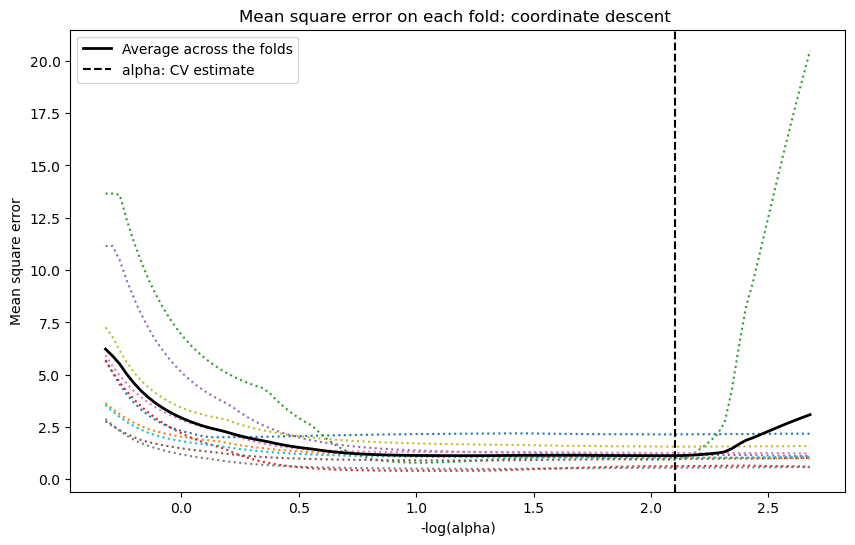

(0.007920284115981521,
 array([ 1.4451092 , -0.85833184,  1.07073169,  0.0881528 , -0.        ,
         0.        , -0.3319418 ,  0.        , -0.        ,  0.        ]))

In [53]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

X_data = df.drop('Y', axis=1).values
Y_data = df['Y'].values
lasso_model = make_pipeline(StandardScaler(), LassoCV(cv=10, random_state=0))
lasso_model.fit(X_data, Y_data)
lasso_cv_model = lasso_model.named_steps['lassocv']
optimal_alpha = lasso_cv_model.alpha_
coefficients = lasso_cv_model.coef_
m_log_alphas = -np.log10(lasso_cv_model.alphas_)

plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, lasso_cv_model.mse_path_, ':')
plt.plot(m_log_alphas, lasso_cv_model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(optimal_alpha), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.legend()

plt.show()

optimal_alpha, coefficients



Your answer:
~~~
Using LassoCV from sklearn for cross-validation, the optimal lambda was found around 0.00792. Lasso effectively reduced coefficients to zero for sparsity, emphasizing the significance of X1, X2, X3, X4, and X7.

~~~

(f) Now generate a response vector Y according to the model $$Y = \beta_{0} + \beta_{7}X^{7} + \epsilon,$$and perform best subset selection and the lasso. Discuss the results obtained.

Your code:

In [54]:

beta_0_new = beta_0  
beta_7_new = 0.2
Y_new = beta_0_new + beta_7_new * X**7 + epsilon
df['Y_new'] = Y_new
X_data_new = df.drop(['Y', 'Y_new'], axis=1).values
Y_data_new = df['Y_new'].values
lasso_model_new = make_pipeline(StandardScaler(), LassoCV(cv=10, random_state=0))
lasso_model_new.fit(X_data_new, Y_data_new)
lasso_cv_model_new = lasso_model_new.named_steps['lassocv']
coefficients_new = lasso_cv_model_new.coef_
optimal_alpha_new = lasso_cv_model_new.alpha_
optimal_alpha_new, coefficients_new


(0.048659650576964746,
 array([-0.        , -0.02595088,  0.        , -0.        ,  3.01520044,
         0.        , 10.61731829,  0.        ,  3.51536249,  0.        ]))

Your answer:

~~~
Lasso effectively identified significant predictors, particularly X7, consistent with the data generation model, demonstrating its efficiency in variable selection and sparsity, contrasting with best subset selection's computational demand and less scalable approach.
~~~

### College

In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [8]:
from ISLP import load_data
college = load_data("College")
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(a) Split the data set into a training set and a test set.

Your code:

In [25]:
college = college.rename(columns={'Unnamed: 0': 'Name'})
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
msk = np.random.rand(len(college)) < 0.8
train = college[msk]
test = college[~msk]

(b) Fit a linear model using least squares on the training set, and report the test error obtained.

Your code:

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train = train.drop('Apps', axis=1) 
y_train = train['Apps']
X_test = test.drop('Apps', axis=1)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(test['Apps'], predictions)

print("Test Error:", mse)


Test Error: 1197513.1571348393




(c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.


Your code:

In [32]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(test['Apps'], predictions)

print("Test Error:", mse)

Test Error: 1196395.385316778



(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

Your code:

In [33]:
from sklearn.linear_model import LassoCV
model = LassoCV(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(test['Apps'], predictions)

print("Test Error:", mse)

Test Error: 1430950.0522278764



(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [20]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [21]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?


Your code:

In [22]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Features

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

(a) Generate a data set with (p = 20) features, (n = 1,000) observations, and an associated quantitative response vector generated according to the model $$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$, where ($\boldsymbol{\beta}$) has some elements that are exactly equal to zero.

Your code:

In [23]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Split your data set into a training set containing (100) observations and a test set containing (900) observations.


Your code:

In [24]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

Your code:

In [25]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Plot the test set MSE associated with the best model of each size.

Your code:

In [26]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~
(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

Your code:

In [27]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.


Your code:

In [28]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Create a plot displaying $\sqrt{\sum_{j=1}^{p}(\beta_{j}-\hat{\beta}_{j}^{r})^{2}}$ for a range of values of ($r$), where $\hat{\beta}_{j}^{r}$ is the $j$th coefficient estimate for the best model containing ($r$) coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?


Your code:

In [29]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Boston

We will now try to predict per capita crime rate in the Boston data set.

In [30]:
Boston = load_data("Boston")

(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.


Your code:

In [31]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.


Your code:

In [1]:
x=123

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Does your chosen model involve all of the features in the data set? Why or why not?


Your code:

In [33]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~



~~~

## Additional Material

### [Advanced] Regularized Regression using Predictive Modeling Platforms in R

#### scikit-learn

Sklearn is probably the goto for most of what you will do on your computer.
Many ways of doing the parameter tuning is described in the lab for your ISLP textbook.

In [34]:
from sklearn.model_selection import train_test_split
# split the data
X_train0, X_test, y_train0, y_test = train_test_split(ames_raw.loc[:,ames_raw.columns != "SalePrice"], ames_raw.loc[:,"SalePrice"], test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split( X_train0, y_train0, test_size=0.25, random_state=11)

train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.
https://www.machinelearningplus.com/pyspark/pyspark-ridge-regression/

In [35]:
import pyspark
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import tempfile
from ISLP import load_data

In [ ]:
spark = SparkSession.builder.appName("Ridge_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/13 12:55:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
Boston = load_data("Boston")
dataset = spark.createDataFrame(Boston)
from pyspark.ml.feature import VectorAssembler
# Define the feature and label columns & Assemble the feature vector
assembler = VectorAssembler(
    inputCols=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio","lstat"],
    outputCol="features")

dataset = assembler.transform(dataset)
final_data = dataset.select("features", "medv")

# Split the data into training and test sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

ridge_regression = LinearRegression(featuresCol="features", labelCol="medv", elasticNetParam=0)
# Define the hyperparameter grid
param_grid = ParamGridBuilder() \
    .addGrid(ridge_regression.regParam, [0.001, 0.01, 0.1, 1.0]) \
    .build()

# Create the cross-validator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol= "medv", metricName="rmse")
cross_validator = CrossValidator(estimator=ridge_regression,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=5)

# Train the model with the best hyperparameters
cv_model = cross_validator.fit(train_data)
ridge_model = cv_model.bestModel

coefficients = ridge_model.coefficients
intercept = ridge_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))
# Make predictions on the test data
predictions = ridge_model.transform(test_data)

# Evaluate the model
rmse = evaluator.evaluate(predictions)
r2 = RegressionEvaluator(predictionCol="prediction", labelCol="medv", metricName="r2").evaluate(predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R2):", r2)

##### Save and load the model

In [ ]:
# Save the model
ridge_model.save("ridge_model")

# Load the model
from pyspark.ml.regression import LinearRegressionModel
loaded_model = LinearRegressionModel.load("ridge_model")

##### Stop pyspark

In [ ]:
spark.stop()

#### Regularized regression using h2o

In [ ]:
# load packages and data
import h2o
localH2O = h2o.init(nthreads = -1, max_mem_size="4g")

train_hf = h2o.H2OFrame(train_df)
valid_hf = h2o.H2OFrame(valid_df)
test_hf = h2o.H2OFrame(test_df)

##### Fitting Ridge regression with grid search

H2O has a few hyperparameter search defined.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-search-in-python

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

predictors = ["SalePrice","Lot Area","Gr Liv Area","Full Bath"]
response = "SalePrice"
glm_h2o_model = H2OGeneralizedLinearEstimator(family="gaussian",
                                      lambda_=0,
                                      compute_p_values=True,
                                      nfolds = 5)
glm_h2o_model.train(x=predictors, y=response, training_frame=train_hf)


hyper_params = {'alpha': [0,0.5,1],
                  'lambda':[10**-7,10**-6,10**-5,10**-4]}

# Train and validate a cartesian grid of GBMs
glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params)
glm_grid1.train(x=predictors, y=response,
                training_frame=train_hf,
                validation_frame=valid_hf,
                seed=1)

# Get the grid results, sorted by validation AUC
glm_gridperf1 = glm_grid1.get_grid(sort_by='r2', decreasing=True)
glm_gridperf1

# Grab the top GBM model, chosen by validation AUC
best_glm1 = glm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_glm_perf1 = best_glm1.model_performance(test_hf)

best_glm_perf1.mse()
# 0.7781778619721595

#prediction=predict(best_model,newdata = test_hf)
#h2o.exportFile(prediction, "/tmp/pred.csv", force = TRUE) #export prediction result as a file


In [ ]:
h2o.shutdown()

## Advanced Content

### Stein's Estimator and shrinkage
So far, we have seen how least squares perform well, even in cases where the true model is not linear.  Then, the natural question we may ask is, can we find an estimator that is better than least squares?  Which <cite data-cite="16598153/A59N9N5V"></cite> worked on, and later <cite data-cite="16598153/M2VTBEWL"></cite> improved upon. It is called the James-Stein estimator or just Stein's estimator.

Stein's estimator is defined as \footnote{In general Stein estimator is $(1-\alpha)\hat{\boldsymbol{\beta}}_{LS}$ for some positive number $\alpha$ less than 1.  }
$$\tilde{\boldsymbol{\beta}}_{stein}=\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)\hat{\boldsymbol{\beta}}_{LS}$$.

According to Stein, for $p>2$
\begin{eqnarray*}
E\parallel \tilde{\boldsymbol{\beta}}_{stein} - \boldsymbol{\beta}_{best}\parallel^2\leq E\parallel \tilde{\boldsymbol{\beta}}_{LS} -\boldsymbol{\beta}_{best}\parallel^2
\end{eqnarray*}

To put it in simple English, the estimator obtained by shirking the LS estimator by $\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$ is a better estimator than LS.  This is puzzling if you think carefully about it, given that LS is BLUE. Also, there is not even a tuning parameter. The only thing that seems to matter is $\frac{\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}$.  The proof is not hard; you can find it at the bottom.  But the important takeaway message is that we can do better than LS by shrinking the estimates.

### Methods to Control Model Complexity

Regression is used for a variety of problems
  - prediction: stock price in the future
	- estimation: denoising, smoothing
	- understanding: figure out what variable(s) are important

A critical characteristic in all situations is that we want a generalizable model. Thus, we often prefer a simpler model over a complex model (why?).  This principle is called Occam's razor.  (Note that a simpler model does not guarantee generalizability. )
What methods are available for us to control the model complexity?

For orthogonal $X_j$ $j=1,\cdots,p$, we can use the shrinkage method as we saw in the Stein estimator $$\tilde{\boldsymbol{\beta}}=\hat{\boldsymbol{\beta}}_{LS}\left(1-\frac{(p-2)\sigma^2}{\parallel\hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$$

Another method is to use a threshold.  There is hard thresholding, where we set all the coefficients that do not pass a certain threshold to zero.
\begin{eqnarray}
\tilde{\beta}_j=\hat{\beta}_j1_{\hat{\beta}_j>\lambda}=\left\{ \begin{array}{ll}
\hat{\beta}_j & \mid\hat{\beta}_j\mid > \lambda\\
0 &\verb|otherwise|\\
\end{array}
\right.
\end{eqnarray}
An alternative is soft thresholding, where we combine shrinkage with hard thresholding.
\begin{eqnarray}
\tilde{\beta}_j=sgn(\hat{\beta}_j)[\mid\hat{\beta}_j\mid-\lambda]_{+}=\left\{ \begin{array}{ll}
\tilde{\beta}_j=\hat{\beta}_j-\lambda & \verb|if |\mid\hat{\beta}_j\mid > \lambda\\
\tilde{\beta}_j=0 & \verb|if |\mid\hat{\beta}_j\mid \leq \lambda \\
\end{array}
\right.
\end{eqnarray}

But what can we do in a more general case where $X$ is not orthogonal or $p$ is bigger than $n$?  One popular thing nowadays is putting a penalty or constraint on the model complexity.  The two most popular ways are the subset selection and shrinkage methods.

#### subset selection

Subset selection is most commonly done by restricting the number of none zero $\tilde{\beta}_j$ to be less than some constant $k$.  But solving that is unfeasible when $p$ is large since it is an N-P hard problem.   In the orthogonal $X$ situation, ordering the $\tilde{\beta}_j$ and choosing $k$ largest subset selection is equivalent to hard thresholding.

#### Shrinkage

For general $X$, we can also perform shrinkage. The idea is to minimize $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta}\parallel^2$ subject to some constraint.  When we set the constraint as $\parallel\boldsymbol{\beta}\parallel^2<t$, the result is called the ridge regression.  Similarly, if we choose the constraint as $\mid\boldsymbol{\beta}\mid<t$, then the result is known as the LASSO (Least Absolute Shrinkage and Selection Operator) regression.  It turns out that this constrained minimization problem can be generalized to minimizing an objective function of the form $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel_{L_p}$ where $\parallel \parallel_{L_p}$ is called the $L_p$ norm and $\lambda$ is the complexity parameter that controls the amount of shrinkage.

##### Ridge Regression

Ridge Regression is used when you don't have collinearity in your predictor variables.  We can consider it a constraint optimization under the $l_2$ norm or shrinkage estimation. So, for a general setting:

observation  | predictor 1     | predictor 2     | $\cdots$ | predictor p     | response
-------------|-----------------|-----------------|----------|-----------------|----------
1            | $x_{11}$        | $x_{12}$        | $\cdots$ | $x_{1p}$        | $y_1$
2            | $x_{21}$        | $x_{22}$        | $\cdots$ | $x_{2p}$        | $y_2$
$\vdots$     | $\vdots$        | $\vdots$        | $\ddots$ | $\vdots$        | $\vdots$
n            | $x_{n1}$        | $x_{n2}$        | $\cdots$ | $x_{np}$        | $y_n$
&nbsp;       | $\mathbf{X}_{1}$| $\mathbf{X}_{2}$| $\cdots$ | $\mathbf{X}_{p}$| $\mathbf{y}$


$$
\mathbf{X}=\left[
\begin{array}{cccc}
\mathbf{X}_{1}&\mathbf{X}_{2}&\cdots &\mathbf{X}_{p} \\
\end{array}
\right]\verb|, and |
\boldsymbol{\beta}=\left[
\begin{array}{c}
\beta_{1} \\
\vdots\\
\beta_{p} \\
\end{array}
\right]
$$

 To find the ridge regression estimate, we want to minimize the objective function of form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\parallel \boldsymbol{\beta}\parallel^2\right)$.  As constrained optimization, we want to minimize $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$ subject to $\parallel \boldsymbol{\beta} \parallel^2 \leq t$ constraint for some constant $t$.



 Imagine a contour defined by $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ with its lowest at $\hat{\boldsymbol{\beta}}_{LS}$.  Now imagine a circle around the origin where the diameter is defined by a tuning parameter $t$ such that it satisfies $\parallel \boldsymbol{\beta} \parallel^2 <t$.  Our solution can only be inside this circle.  Without any constraint on $t$, i.e. $t=\infty$ we will get $\hat{\boldsymbol{\beta}}_{LS}$ as an estimate that minimizes $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$. But as t gets smaller, we depart from our $\hat{\boldsymbol{\beta}}_{LS}$ since the solution has to be within the circle.  Thus, we can see that the solution we want is on the circle closest to $\hat{\boldsymbol{\beta}}_{LS}$, which is the point circle that touches the ellipse.  Equivalently, our solution can be thought of as shrinkage.  As t gets smaller, we are shrinking our $\hat{\boldsymbol{\beta}}_{LS}$  toward zero on the diagonal line from $\hat{\boldsymbol{\beta}}_{LS}$ to the origin.

 ![Ridge Image](Images/Ridge.png)


So lets solve for $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2$
\begin{eqnarray*}
\frac{\partial }{\partial \boldsymbol{\beta}}\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2&=&-2( \mathbf{y}-\mathbf{X}\boldsymbol{\beta})X +2\lambda\boldsymbol{\beta}\\
&\Rightarrow&  -\mathbf{y}^T\mathbf{X}+\hat{\boldsymbol{\beta}}\mathbf{X}^T\mathbf{X} + \lambda\hat{\boldsymbol{\beta}}=0\\
&=& \hat{\boldsymbol{\beta}}(\mathbf{X}^T\mathbf{X} +\lambda I)=\mathbf{y}^TX\\
&=& \hat{\boldsymbol{\beta}}=(\mathbf{X}^T\mathbf{X} +\lambda I)^{-1}\mathbf{y}^TX\\
\end{eqnarray*}
Hence we see $\hat{\boldsymbol{\beta}}_{pythonidge}=(\mathbf{X}^T\mathbf{X} +\lambda \mathbf{I})^{-1}\mathbf{y}^T\mathbf{X}$.

##### LASSO (Least Absolute Shrinkage and Selection Operator)

The idea of LASSO is similar to Ridge Regression. Using the same setting as before, the only difference is we want to minimize an objective function of the form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\mid \boldsymbol{\beta}\mid\right)$ or equivalently perform constraint minimization of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ subject to $\mid \boldsymbol{\beta} \mid\leq t$ constraint ($\mid \boldsymbol{\beta} \mid=\sum^p_{j=1}\mid \beta_j\mid$).

Geometrically speaking (for $p=2$ case) we want to find $\hat{\boldsymbol{\beta}}$ that is closest to $\hat{\boldsymbol{\beta}}_{LS}$ within the diamond shaped region that is $\mid \boldsymbol{\beta} \mid<t$.
Unlike $L_2$ norm, $L_1$ norm has corners and edges that touch the contour of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ first most of the time.  This acts as the variable selector in high-dimensional space.  Thus, when we look at the solution path of LASSO, we see some coefficients take on the value of zero.

 ![Lasso Image](Images/Lasso.png)

As $t$ increases, we gradually see more and more $\boldsymbol{\beta}$s coming into our model.  And this goes on until all $t$ is so big that the diamond shaped region includes $\hat{\boldsymbol{\beta}}_{LS}$, in which case, all the estimates of $\hat{\boldsymbol{\beta}}$ becomes $\hat{\boldsymbol{\beta}}_{LS}$.  Or conversely, if you decrease your $t$, to zero your estimated  $\hat{\boldsymbol{\beta}}$ starts to get shrunk toward zero from $\hat{\boldsymbol{\beta}}_{LS}$.  So you can see that we are doing shrinkage estimation. Then, we want to choose $t$ to get the sparsest model with the lowest cross-validation error.

 ![Lasso Path Image](Images/Lasso_path.png)

### Proofs

#### Stein's lemma
We first need Stein's lemma.`
\noindent{\bf Stein's Lemma}
According to Stein's lemma, for $Z\sim N\left(\mu,\sigma^2\right)$, $E\left[(z-\mu)g(z)\right]=\sigma^2E\left[g'(z)\right]$.
\subsubsection*{proof}
\begin{eqnarray*}
E\left[(z-\mu)g(z)\right]&=&\int(z-\mu)g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}dz\\
&=&-\sigma^2g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\Bigr|^{\infty}_{-\infty}+\sigma^2\int g'(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\\
&=&\sigma^2E\left[g'(z)\right]
\end{eqnarray*}

#### Proof: Stein's estimator outperforms LS

We are ready to prove that Stein's estimator outperforms the least square's estimate.  We will denote for the simplicity $\hat{\boldsymbol{\beta}}_{LS} = \boldsymbol{\beta}$ and $\boldsymbol{\beta}_{best} =\boldsymbol{\theta}$.
\begin{eqnarray*}
E\parallel \boldsymbol{\beta}-\boldsymbol{\theta} \parallel ^2&=&E\left[\sum^p_{i=1}\left( \beta_i-\theta_i \right)^2\right]\\
&=&p\sigma^2
\end{eqnarray*}
\begin{eqnarray*}
E\left[\Biggl|\Biggl|\left(1-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\right)\boldsymbol{\beta} -\boldsymbol{\theta} \Biggr|\Biggr| ^2\right]&=&E\left[\Biggl|\Biggl| (\boldsymbol{\beta}-\boldsymbol{\theta})-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}\Biggr|\Biggr|^2\right]\\
&=&E\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]-2E\left[ \langle \boldsymbol{\beta}-\boldsymbol{\theta}, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]=(*)\\
\end{eqnarray*}
Since $E\left[ \langle \boldsymbol{\beta}-\theta, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]$ can be simplified as follows
\begin{eqnarray*}
E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}_i \right] &=& E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i \right]\\
\end{eqnarray*}
Letting $\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i=g(x_i)$, we can use Stein's lemma. Hence
\begin{eqnarray*}
 E\left[\sum^p_{i=1}(\beta_i-\theta_i)\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right]&=& \sigma^2\sum^p_{i=1}E\left[\left(\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right)'\right]\\
&=&\sigma^2\sum^p_{i=1} E\left[\frac{(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{(p-2)\sigma^2 2\beta_i^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&\sigma^2E\left[\frac{p(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{2(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]
\end{eqnarray*}

Therefore:
\begin{eqnarray*}
(*)&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}-2\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2-\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\leq E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2\right] = p\sigma^2
\end{eqnarray*}

### Reference